<a href="https://colab.research.google.com/github/mijin0721/Sentiment_analysis_AI/blob/main/Model_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 수집

In [ ]:
import pandas as pd

df = pd.read_csv("/content/train_data_No1.csv")
df

,review,score,label
0,ㄱㅅ,1,1
1,ㄱㅇㄷ,1,1
2,가격이 싸다,1,1
3,가까이 사귀어,1,1
4,가까이하다,1,1
...,...,...,...
14657,오류,-2,0
14658,의혹,-1,0
14659,내팽개치다,-2,0
14660,횡령,-2,0


### No.1

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train_data_No1.csv")
df

,score,review,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
399995,2,장마라그런가!!! 달지않아요,0
399996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,1
399997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,1
399998,5,넘이쁘고 쎄련되보이네요~,1


### No.2

In [ ]:
total_data1.head()

NameError: ignored

In [ ]:
total_data2.columns = ['ratings', 'reviews', 'label']
total_data2.head()

NameError: ignored

In [ ]:
df = pd.concat([total_data1,total_data2])
print(len(df))

394451


###### 쇼핑리뷰

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 9.86 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-12-10 02:34:11--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22e9:9f55, 2406:da00:ff00::3403:4be7, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bb

In [ ]:
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7f44041a15e0>)

In [ ]:
total_data1= pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data1)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 200000


In [ ]:
total_data1['label'] = np.select([total_data1.ratings > 3], [1], default=0)
total_data1[:5]

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [ ]:
total_data1['ratings'].nunique(), total_data1['reviews'].nunique(), total_data1['label'].nunique()

(4, 199908, 2)

In [ ]:
total_data1.drop_duplicates(subset=['reviews'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(total_data1))

총 샘플의 수 : 199908


In [ ]:
print(total_data1.isnull().values.any())

False


###### 영화리뷰

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f06856f61c0>)

In [ ]:
total_data2= pd.read_table('ratings.txt')
print('전체 리뷰 개수 :',len(total_data2))

전체 리뷰 개수 : 200000


In [ ]:
total_data2['document'].nunique(), total_data2['label'].nunique()

(194543, 2)

In [ ]:
total_data2.drop_duplicates(subset=['document'], inplace=True)

In [ ]:
print('총 샘플의 수 :',len(total_data2))

총 샘플의 수 : 194544


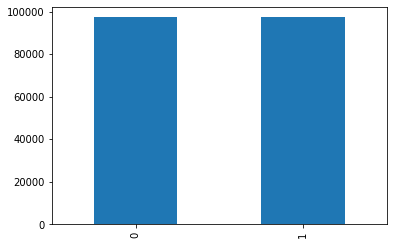

In [ ]:
total_data2['label'].value_counts().plot(kind = 'bar')

In [ ]:
print(total_data2.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  97277
1      1  97267


In [ ]:
print(total_data2.isnull().values.any())

True


In [ ]:
print(total_data2.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [ ]:
total_data2 = total_data2.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(total_data2.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
print(len(total_data2))

194543


## 기본 세팅

In [ ]:
import re

def text_clearing(text): 
  hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
  result = hangul.sub('', text)
  return result

In [ ]:
df["ko_review"] = df["review"].apply(lambda x : text_clearing(str(x)))

In [ ]:
df.drop("review", axis=1, inplace=True)
df

,score,label,ko_review
0,1,1,ㄱㅅ
1,1,1,ㄱㅇㄷ
2,1,1,가격이 싸다
3,1,1,가까이 사귀어
4,1,1,가까이하다
...,...,...,...
14657,-2,0,오류
14658,-1,0,의혹
14659,-2,0,내팽개치다
14660,-2,0,횡령


In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True, random_state=34)

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 465 kB 53.9 MB/s 


In [ ]:
from konlpy.tag import Okt

okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [ ]:
from tqdm import tqdm

X_train = []
for sentence in tqdm(train_data['ko_review']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|██████████| 11729/11729 [00:19<00:00, 616.28it/s] 


In [ ]:
X_test = []
for sentence in tqdm(test_data['ko_review']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|██████████| 2933/2933 [00:01<00:00, 2157.73it/s]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
print(tokenizer.word_index)

{'을': 1, '못': 2, '다': 3, '되다': 4, '없다': 5, '마음': 6, '하고': 7, '몹시': 8, '매우': 9, '이나': 10, '없이': 11, '스럽게': 12, '하': 13, '아니다': 14, '모양': 15, '좋다': 16, '적': 17, '로': 18, '자꾸': 19, '않다': 20, '게': 21, '스럽다': 22, '있다': 23, '거나': 24, '함': 25, '사람': 26, '고': 27, '행동': 28, '아름답다': 29, '일': 30, '아프다': 31, '느낌': 32, '뛰어나다': 33, '부드럽다': 34, '자다': 35, '병': 36, '데': 37, '거리': 38, '이다': 39, '나': 40, '맞다': 41, '스러운': 42, '것': 43, '심하다': 44, '조금': 45, '짓': 46, '어렵다': 47, '속이다': 48, '남': 49, '거치다': 50, '타다': 51, '인': 52, '언짢다': 53, '되어다': 54, '말': 55, '슬프다': 56, '훌륭하다': 57, '성': 58, '즐겁다': 59, '상태': 60, '힘': 61, '따위': 62, '아주': 63, '받다': 64, '깨끗하다': 65, '나다': 66, '몸': 67, '함부로': 68, '지': 69, '사랑': 70, '며': 71, '들다': 72, '어지럽다': 73, '보드랍다': 74, '여기다': 75, '괴롭다': 76, '대다': 77, '보다': 78, '웃다': 79, '잃다': 80, '답답하다': 81, '맑다': 82, '지혜': 83, '때': 84, '귀엽다': 85, '뜻': 86, '싫다': 87, '앓다': 88, '기쁘다': 89, '밝다': 90, '정도': 91, '내다': 92, '불평': 93, '사납다': 94, '밉다': 95, '근심': 96, '듯': 97, '나쁘다': 98, '정신': 99, '안타깝다': 

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 4280
등장 빈도가 2번 이하인 희귀 단어의 수: 2509
단어 집합에서 희귀 단어의 비율: 58.6214953271028
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 14.251668255481412


In [ ]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 1772


In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
import numpy as np

y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))

리뷰의 최대 길이 : 8
리뷰의 평균 길이 : 1.687185608321255


In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 100.0


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# 모델링

### RNN
정확도: 0.8568

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 64
hidden_units = 64

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
3945/3945 [==============================] - 94s 22ms/step - loss: 0.3782 - acc: 0.8365 - val_loss: 0.3426 - val_acc: 0.8575
Epoch 2/3
3945/3945 [==============================] - 83s 21ms/step - loss: 0.3431 - acc: 0.8583 - val_loss: 0.3360 - val_acc: 0.8612
Epoch 3/3
3945/3945 [==============================] - 83s 21ms/step - loss: 0.3304 - acc: 0.8646 - val_loss: 0.3397 - val_acc: 0.8593


In [ ]:
#X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

2466/2466 [==============================] - 11s 4ms/step - loss: 0.3423 - acc: 0.8545

 테스트 정확도: 0.8545


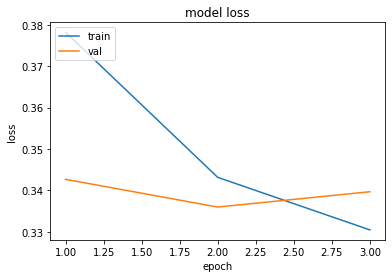

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### LSTM
정확도: 0.8814

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(5))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('LSTM_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
147/147 [==============================] - ETA: 0s - loss: 0.5165 - acc: 0.7552
Epoch 1: val_acc improved from -inf to 0.89812, saving model to LSTM_model.h5
147/147 [==============================] - 21s 98ms/step - loss: 0.5165 - acc: 0.7552 - val_loss: 0.3188 - val_acc: 0.8981
Epoch 2/15
147/147 [==============================] - ETA: 0s - loss: 0.2319 - acc: 0.9077
Epoch 2: val_acc improved from 0.89812 to 0.91560, saving model to LSTM_model.h5
147/147 [==============================] - 13s 89ms/step - loss: 0.2319 - acc: 0.9077 - val_loss: 0.2439 - val_acc: 0.9156
Epoch 3/15
147/147 [==============================] - ETA: 0s - loss: 0.1858 - acc: 0.9201
Epoch 3: val_acc did not improve from 0.91560
147/147 [==============================] - 15s 105ms/step - loss: 0.1858 - acc: 0.9201 - val_loss: 0.2487 - val_acc: 0.9126
Epoch 4/15
147/147 [==============================] - ETA: 0s - loss: 0.1748 - acc: 0.9228
Epoch 4: val_acc improved from 0.91560 to 0.92114, saving mod

In [ ]:
LSTM_model = load_model('LSTM_model.h5')
print("\n 테스트 정확도: %.4f" % (LSTM_model.evaluate(X_test, y_test)[1]))

92/92 [==============================] - 2s 19ms/step - loss: 0.2915 - acc: 0.8814

 테스트 정확도: 0.8814


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         177200    
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 295,099
Trainable params: 295,099
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.models import load_model
LSTM_model.save('/content/drive/MyDrive/RNN_LSTM.h5')

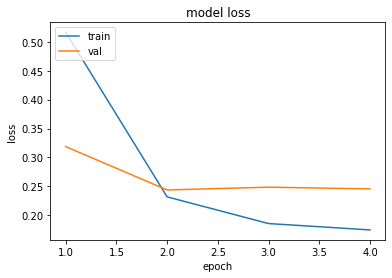

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### GRU
정확도: 0.8828

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
3945/3945 [==============================] - ETA: 0s - loss: 0.3382 - acc: 0.8553
Epoch 1: val_acc improved from -inf to 0.87292, saving model to GRU_model.h5
3945/3945 [==============================] - 348s 88ms/step - loss: 0.3382 - acc: 0.8553 - val_loss: 0.3047 - val_acc: 0.8729
Epoch 2/15
3945/3945 [==============================] - ETA: 0s - loss: 0.2886 - acc: 0.8815
Epoch 2: val_acc improved from 0.87292 to 0.88104, saving model to GRU_model.h5
3945/3945 [==============================] - 343s 87ms/step - loss: 0.2886 - acc: 0.8815 - val_loss: 0.2894 - val_acc: 0.8810
Epoch 3/15
3945/3945 [==============================] - ETA: 0s - loss: 0.2686 - acc: 0.8923
Epoch 3: val_acc improved from 0.88104 to 0.88345, saving model to GRU_model.h5
3945/3945 [==============================] - 343s 87ms/step - loss: 0.2686 - acc: 0.8923 - val_loss: 0.2862 - val_acc: 0.8834
Epoch 4/15
3945/3945 [==============================] - ETA: 0s - loss: 0.2536 - acc: 0.8998
Epoch 4: val_

In [ ]:
GRU_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (GRU_model.evaluate(X_test, y_test)[1]))

2466/2466 [==============================] - 28s 11ms/step - loss: 0.2879 - acc: 0.8820

 테스트 정확도: 0.8820


In [ ]:
from keras.models import load_model
GRU_model.save('/content/drive/MyDrive/RNN_GRU.h5')

NameError: ignored

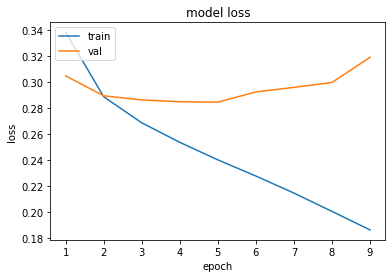

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### BiLSTM
정확도: 0.8821

In [ ]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units))) # Bidirectional LSTM을 사용
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('BiLSTM_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=256, validation_split=0.2)

NameError: ignored

In [ ]:
BiLSTM_model = load_model('BiLSTM_model.h5')
print("\n 테스트 정확도: %.4f" % (BiLSTM_model.evaluate(X_test, y_test)[1]))

2500/2500 [==============================] - 81s 32ms/step - loss: 0.2886 - acc: 0.8821

 테스트 정확도: 0.8821


In [ ]:
from keras.models import load_model
BiLSTM_model.save('/content/drive/MyDrive/RNN_BiLSTM.h5')

### 1D CNN No.1
정확도: 0.8700

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

embedding_dim = 128
dropout_ratio = (0.5, 0.8)
num_filters = 128
hidden_units = 128

In [ ]:
model_input = Input(shape = (max_len,))
z = Embedding(vocab_size, embedding_dim, input_length = max_len, name="embedding")(model_input)
z = Dropout(dropout_ratio[0])(z)

In [ ]:
conv_blocks = []

for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)

In [ ]:
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_ratio[1])(z)
z = Dense(hidden_units, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('CNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2, verbose=2, callbacks=[es, mc])

Epoch 1/10

Epoch 1: val_acc improved from -inf to 0.86308, saving model to CNN_model.h5
4000/4000 - 395s - loss: 0.3833 - acc: 0.8296 - val_loss: 0.3326 - val_acc: 0.8631 - 395s/epoch - 99ms/step
Epoch 2/10

Epoch 2: val_acc improved from 0.86308 to 0.86708, saving model to CNN_model.h5
4000/4000 - 383s - loss: 0.3209 - acc: 0.8672 - val_loss: 0.3247 - val_acc: 0.8671 - 383s/epoch - 96ms/step
Epoch 3/10

Epoch 3: val_acc improved from 0.86708 to 0.86973, saving model to CNN_model.h5
4000/4000 - 385s - loss: 0.2976 - acc: 0.8782 - val_loss: 0.3167 - val_acc: 0.8697 - 385s/epoch - 96ms/step
Epoch 4/10

Epoch 4: val_acc improved from 0.86973 to 0.87052, saving model to CNN_model.h5
4000/4000 - 381s - loss: 0.2786 - acc: 0.8864 - val_loss: 0.3144 - val_acc: 0.8705 - 381s/epoch - 95ms/step
Epoch 5/10

Epoch 5: val_acc did not improve from 0.87052
4000/4000 - 380s - loss: 0.2664 - acc: 0.8925 - val_loss: 0.3214 - val_acc: 0.8687 - 380s/epoch - 95ms/step
Epoch 6/10

Epoch 6: val_acc did not 

In [ ]:
CNN_model = load_model('CNN_model.h5')
print("\n 테스트 정확도: %.4f" % (CNN_model.evaluate(X_test, y_test)[1]))

2500/2500 [==============================] - 24s 10ms/step - loss: 0.3144 - acc: 0.8700

 테스트 정확도: 0.8700


In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/1DCNN_No1.h5')

### 1D CNN No.2
정확도: 0.8666

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 64
dropout_ratio = 0.3
num_filters = 64
kernel_size = 5

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
3999/4000 [============================>.] - ETA: 0s - loss: 0.3688 - acc: 0.8389
Epoch 1: val_acc improved from -inf to 0.86828, saving model to best_model.h5
4000/4000 [==============================] - 212s 53ms/step - loss: 0.3688 - acc: 0.8389 - val_loss: 0.3172 - val_acc: 0.8683
Epoch 2/10
4000/4000 [==============================] - ETA: 0s - loss: 0.3029 - acc: 0.8763
Epoch 2: val_acc improved from 0.86828 to 0.87131, saving model to best_model.h5
4000/4000 [==============================] - 208s 52ms/step - loss: 0.3029 - acc: 0.8763 - val_loss: 0.3102 - val_acc: 0.8713
Epoch 3/10
4000/4000 [==============================] - ETA: 0s - loss: 0.2733 - acc: 0.8906
Epoch 3: val_acc did not improve from 0.87131
4000/4000 [==============================] - 203s 51ms/step - loss: 0.2733 - acc: 0.8906 - val_loss: 0.3178 - val_acc: 0.8696
Epoch 4/10
4000/4000 [==============================] - ETA: 0s - loss: 0.2493 - acc: 0.9015
Epoch 4: val_acc did not improve from 0.87131

In [ ]:
CNN_model_No2 = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (CNN_model_No2.evaluate(X_test, y_test)[1]))

2500/2500 [==============================] - 8s 3ms/step - loss: 0.3127 - acc: 0.8713

 테스트 정확도: 0.8713


In [ ]:
from keras.models import load_model
BiLSTM_model.save('/content/drive/MyDrive/CNN_No2.h5')

### 1D CNN No.3
정확도: 0.8757

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

embedding_dim = 64 # 임베딩 벡터의 차원
dropout_ratio = 0.3 # 드롭아웃 비율
num_filters = 32 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 32 # 뉴런의 수

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('CNN3_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[es, mc])

Epoch 1/10
 9999/10000 [============================>.] - ETA: 0s - loss: 0.3515 - acc: 0.8503
Epoch 1: val_acc improved from -inf to 0.87099, saving model to CNN3_model.h5
10000/10000 [==============================] - 276s 27ms/step - loss: 0.3515 - acc: 0.8503 - val_loss: 0.3064 - val_acc: 0.8710
Epoch 2/10
 9999/10000 [============================>.] - ETA: 0s - loss: 0.2899 - acc: 0.8826
Epoch 2: val_acc improved from 0.87099 to 0.87424, saving model to CNN3_model.h5
10000/10000 [==============================] - 267s 27ms/step - loss: 0.2899 - acc: 0.8826 - val_loss: 0.3015 - val_acc: 0.8742
Epoch 3/10
 9999/10000 [============================>.] - ETA: 0s - loss: 0.2621 - acc: 0.8955
Epoch 3: val_acc did not improve from 0.87424
10000/10000 [==============================] - 262s 26ms/step - loss: 0.2621 - acc: 0.8955 - val_loss: 0.3086 - val_acc: 0.8722
Epoch 4/10
10000/10000 [==============================] - ETA: 0s - loss: 0.2409 - acc: 0.9049
Epoch 4: val_acc improved from 

In [ ]:
from keras.models import load_model

CNN_model_No3 = load_model('CNN3_model.h5')
print("\n 테스트 정확도: %.4f" % (CNN_model_No3.evaluate(X_test, y_test)[1]))

2500/2500 [==============================] - 8s 3ms/step - loss: 0.3214 - acc: 0.8757

 테스트 정확도: 0.8757


In [ ]:
from keras.models import load_model
CNN_model_No3.save('/content/drive/MyDrive/CNN_No3.h5')

### 앙상블
정확도 : 0.5550375

In [ ]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
lr_clf = LogisticRegression(solver="liblinear")
knn_clf = KNeighborsClassifier(n_neighbors=8)
vo_clf = VotingClassifier(estimators=[("LR", lr_clf), ("KNN", knn_clf)], voting="soft")

In [ ]:
classifiers = [vo_clf, lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    name = classifier.__class__.__name__
    print(f"{name} 정확도 : {accuracy_score(y_test, pred)}")

VotingClassifier 정확도 : 0.5550375
LogisticRegression 정확도 : 0.5439125
KNeighborsClassifier 정확도 : 0.54995


# 테스트

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/test_data_No1.txt', 'r') as f:
    data = f.readlines()

data = ', '.join(data)
data = data[:1000]
print(len(data))

1000


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_data.csv',encoding='utf-8')
df

,id,review,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
94,4663025,뭘 만든 건가?,0
95,6753658,전기톱은못들고다니는데 엔진톱이겠죠,0
96,9665771,완전 재밌엇는데 왜 평점이??,1
97,8757576,제임스 완이 내 목표임 ㄷ,1


In [ ]:
data = df['review']

### LSTM

In [ ]:
def sentiment_predict_LSTM(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(LSTM_model.predict(pad_new)) # 예측
  if(score > 0.5):
    return 1
  else:
    return 0

In [ ]:
df_result_LSTM = []
for i in range(len(data)):
    sentence = data[i]
    result = sentiment_predict_LSTM(sentence)
    df_result_LSTM.append(result)

1/1 [==============================] - 0s 24ms/step


In [ ]:
df_result_LSTM=pd.DataFrame(df_result_LSTM,columns=['결과'])
df_result_LSTM
#df_result.to_excel('/content/drive/MyDrive/result_LSTM.xlsx')

,결과
0,1
1,1
2,0
3,0
4,0
...,...
94,0
95,0
96,1
97,1


### GRU

In [ ]:
def sentiment_predict_GRU(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(GRU_model.predict(pad_new)) # 예측
  if(score > 0.5):
    return 1
  else:
    return 0

In [ ]:
df_result_GRU = []
for i in range(len(data)):
    sentence = data[i]
    result = sentiment_predict_GRU(sentence)
    df_result_GRU.append(result)

1/1 [==============================] - 0s 23ms/step


In [ ]:
df_result_GRU=pd.DataFrame(df_result_GRU,columns=['결과'])
#df_result_GRU.to_excel('/content/drive/MyDrive/result_GRU.xlsx')

### BiLSTM

In [ ]:
def sentiment_predict_BiLSTM(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(BiLSTM_model.predict(pad_new)) # 예측
  if(score > 0.5):
    return 1
  else:
    return 0

In [ ]:
df_result_BiLSTM = []
for i in range(len(data)):
    sentence = data[i]
    result = sentiment_predict_BiLSTM(sentence)
    df_result_BiLSTM.append(result)

1/1 [==============================] - 0s 26ms/step


In [ ]:
df_result_BiLSTM=pd.DataFrame(df_result_BiLSTM,columns=['결과'])

#df_result.to_excel('/content/drive/MyDrive/result_BiLSTM.xlsx')